# 실습과제3

보스턴 주택 데이터셋을 활용하여 Linear Regression을 학습시키세요.
1. 데이터를 시각화하고 어떤 feature가 가장 낮은 RMSE값을 가질지 예측해보세요.
2. Linear regression을 통한 회귀 계수 및 MSE, RMSE 출력(전체 feature 사용)
3. 가장 낮은 RMSE를 갖는 feature를 찾으세요.

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
# 사이킷런 1.2 version 이상부터 윤리적 이유로 boston 데이터가 삭제되어 원본 데이터 가져옴
data_url = "http://lib.stat.cmu.edu/datasets/boston"
raw_df = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [4]:
# 데이터프레임 생성
columns = [
    "CRIM", "ZN", "INDUS", "NOX", "RM", "AGE", "DIS", "TAX",
    "PTRATIO", "B", "LSTAT"
]

# 원본 데이터에서 짝수 행만 선택, 그에 해당하는 열은 위에서 정의한 colums에 따라 이름이 지정
df = pd.DataFrame(data=raw_df.values[::2, :], columns=columns)

# target 변수 추가
# MEDV는 보스턴 주택의 중앙값
# 원본 데이터에서 홀수 행의 2번째 열을 선택하여 MEDV 추가
df["MEDV"] = raw_df.values[1::2, 2]

# 데이터프레임 확인
print(df.head())

      CRIM    ZN  INDUS  NOX     RM    AGE   DIS     TAX  PTRATIO      B  \
0  0.00632  18.0   2.31  0.0  0.538  6.575  65.2  4.0900      1.0  296.0   
1  0.02731   0.0   7.07  0.0  0.469  6.421  78.9  4.9671      2.0  242.0   
2  0.02729   0.0   7.07  0.0  0.469  7.185  61.1  4.9671      2.0  242.0   
3  0.03237   0.0   2.18  0.0  0.458  6.998  45.8  6.0622      3.0  222.0   
4  0.06905   0.0   2.18  0.0  0.458  7.147  54.2  6.0622      3.0  222.0   

   LSTAT  MEDV  
0   15.3  24.0  
1   17.8  21.6  
2   17.8  34.7  
3   18.7  33.4  
4   18.7  36.2  


In [11]:
# raw_df의 컬럼명을 확인하여 CHAS와 RAD를 제외한 나머지 컬럼을 사용
# 기존 boston 데이터랑은 다르게 CHAS랑 RAD 컬럼이 없었음..
features_without_CHAS_RAD = [column for column in df.columns if column not in ['CHAS', 'RAD']]
print(features_without_CHAS_RAD)

['CRIM', 'ZN', 'INDUS', 'NOX', 'RM', 'AGE', 'DIS', 'TAX', 'PTRATIO', 'B', 'LSTAT', 'MEDV']


### 1. 데이터를 시각화하고 어떤 feature가 가장 낮은 RMSE값을 가질지 예측해보세요.

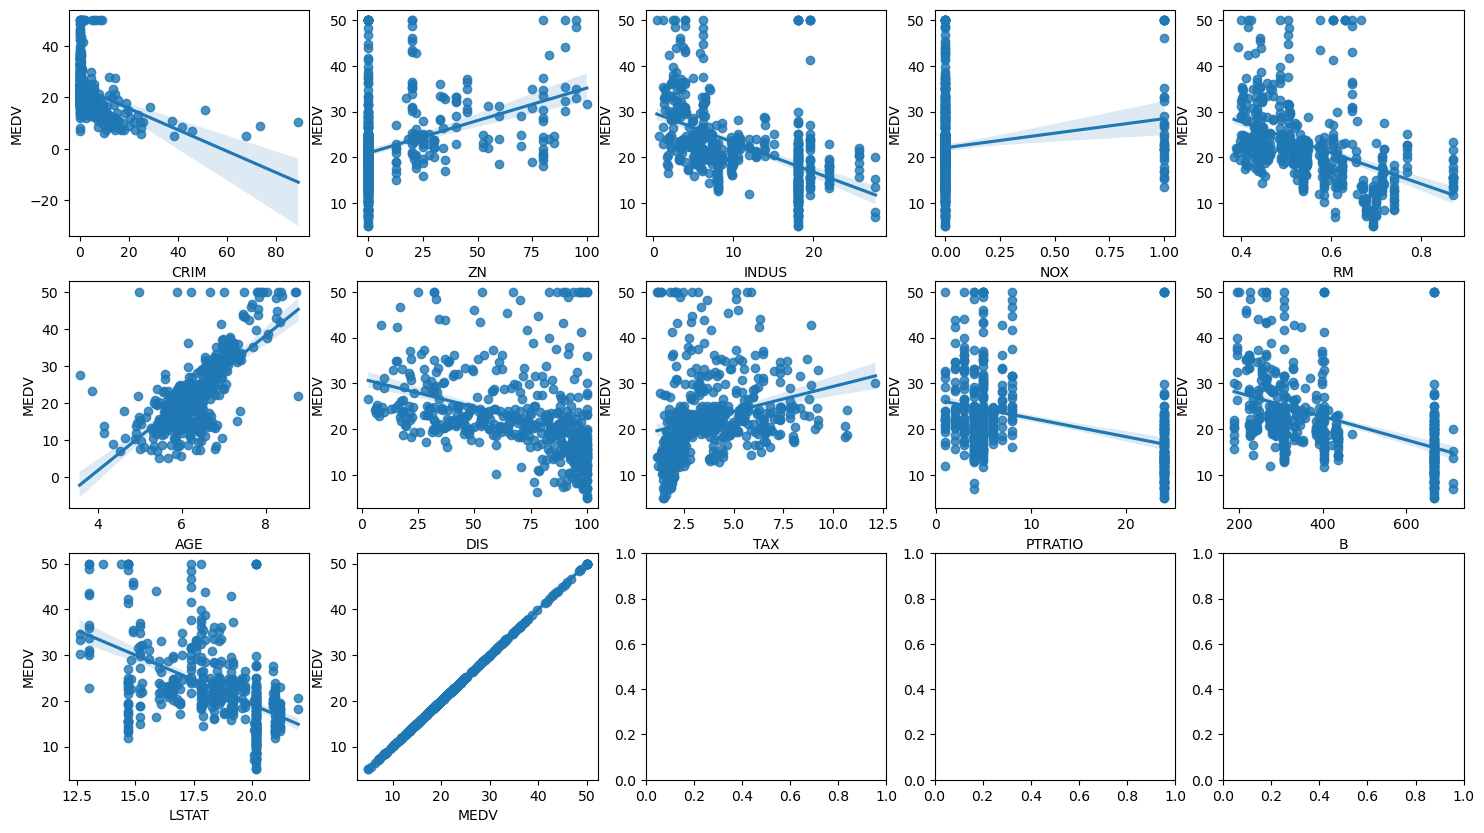

In [6]:
fig, axs = plt.subplots(figsize = (18, 10), ncols = 5, nrows = 3)
for i, feature in enumerate(features_without_CHAS_RAD):
    row = int(i/5)
    col = i%5
    sns.regplot(data = df, x = feature, y = "MEDV", ax= axs[row][col])

# row 행, col 열
# axs[row][col] 어디에 해당 plot을 위치시킬지에 대한 것입니다.

### 2. Linear regression을 통한 회귀 계수 및 MSE, RMSE 출력(전체 feature 사용)

In [7]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X = df[features_without_CHAS_RAD]
y = df['MEDV']

X_train, X_test, y_train, y_test = train_test_split(X,y, random_state=42)

model = LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [8]:
print("Intercept:", model.intercept_)
print("Coefficients: ", model.coef_)

Intercept: 1.4210854715202004e-14
Coefficients:  [ 0.00000000e+00 -3.16943418e-16  1.50966881e-16  1.96546532e-15
  1.99950649e-14 -3.39030675e-16 -1.16408844e-16  4.07854124e-16
 -8.30308828e-17 -1.40181305e-17 -1.78983593e-16  1.00000000e+00]


In [9]:
y_predict = model.predict(X_test)

In [10]:
mse = mean_squared_error(y_test, y_predict)
rmse = np.sqrt(mse)
print("MSE:", mse)
print("RMSE:", rmse)

MSE: 5.794711326619542e-29
RMSE: 7.61230012980278e-15


### 3. y에 대해 가장 낮은 RMSE를 갖는 feature를 찾으세요.

In [14]:
rmse_per_feature = {}
for feature in features_without_CHAS_RAD:
    X = df.drop(columns=['MEDV'])
    y = df['MEDV']
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
    model = LinearRegression()
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    rmse_per_feature[feature] = rmse
min_rmse_feature = min(rmse_per_feature, key=rmse_per_feature.get)
print("가장 낮은 RMSE를 갖는 feature:", min_rmse_feature)
print("해당 feature의 RMSE:", rmse_per_feature[min_rmse_feature])

가장 낮은 RMSE를 갖는 feature: CRIM
해당 feature의 RMSE: 5.387863998079242
